# Unit-6 Classification-model Training and evaluation

- 1)KNN algorithm(k-nearest Neighbors)
- 2)Decision Tree Algorithm
#### KNN -> classification and Regression
- Data Preparation
- Choose k
- Compute distance(Euclidean,Manhattan,Minkowski)
- Identify neigbour
- Make prediction

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
x=df.iloc[:,:8]
y=df['Outcome']
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [30]:
from sklearn.neighbors import KNeighborsClassifier
nn=KNeighborsClassifier(n_neighbors=9)
model=nn.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0]


In [31]:
diff=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
diff

,Actual,Predicted
285,0,1
101,0,0
581,0,0
352,0,0
726,0,0
...,...,...
563,0,0
318,0,0
154,1,1
684,0,0


In [32]:
diff.to_csv("diabetes_data1.csv")

In [12]:
diff[diff.Actual==diff.Predicted]

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
725,0,0
355,1,1
534,0,0
344,0,0


In [33]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[85, 14],
       [22, 33]], dtype=int64)

In [34]:
TN=cm[0][0] #True Negative
FP=cm[0][1] #False Positive
FN=cm[1][0] #False Negative
TP=cm[1][1] #True Positive
print(TN,FP,FN,TP)

85 14 22 33


### Model Accuracy / Accuracy Score

In [35]:
accuracy=(TP+TN)/(TP+TN+FN+FP)
print(accuracy)

0.7662337662337663


In [36]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7662337662337663


In [39]:
from sklearn.neighbors import KNeighborsClassifier
l=[]
for i in range(1,51):
    nn=KNeighborsClassifier(n_neighbors=i)
    model=nn.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    l.append(accuracy)
print(l)

[0.7207792207792207, 0.7272727272727273, 0.7402597402597403, 0.7207792207792207, 0.7337662337662337, 0.7727272727272727, 0.7597402597402597, 0.7662337662337663, 0.7662337662337663, 0.7597402597402597, 0.7467532467532467, 0.7727272727272727, 0.7662337662337663, 0.7727272727272727, 0.7857142857142857, 0.7857142857142857, 0.7857142857142857, 0.7727272727272727, 0.7727272727272727, 0.7727272727272727, 0.7662337662337663, 0.7727272727272727, 0.7662337662337663, 0.7792207792207793, 0.7532467532467533, 0.7727272727272727, 0.7532467532467533, 0.7662337662337663, 0.7662337662337663, 0.7792207792207793, 0.7727272727272727, 0.7727272727272727, 0.7597402597402597, 0.7727272727272727, 0.7597402597402597, 0.7792207792207793, 0.7597402597402597, 0.7792207792207793, 0.7532467532467533, 0.7727272727272727, 0.7597402597402597, 0.7662337662337663, 0.7597402597402597, 0.7662337662337663, 0.7597402597402597, 0.7597402597402597, 0.7597402597402597, 0.7532467532467533, 0.7597402597402597, 0.7467532467532467]

In [45]:
print(l.index(max(l)))
print("Maximum Accuracy:",max(l))
print(l[14:17])

14
Maximum Accuracy: 0.7857142857142857
[0.7857142857142857, 0.7857142857142857, 0.7857142857142857]


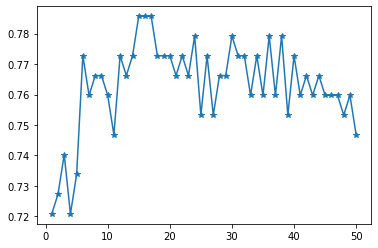

In [46]:
import matplotlib.pyplot as plt
plt.plot(range(1,51),l,marker="*")
plt.show()

### Error Rate

- Error rate=(FP+FN)/(TP+TN+FP+FN)


- sensitivity-> Measures the proportion of TP examples or positive cases which were correctly classified.
    (recall)                   sensitivity=TP/(TP+FN)


- specificity->measures of proportion of negative examples which havebeen correctly classified.
                       specificity=TN/(TN+FP)

In [47]:
from sklearn.metrics import recall_score
sensitivity=recall_score(y_test,y_pred)
print(sensitivity)
specificity=recall_score(y_test,y_pred,pos_label=0)
print(specificity)

0.41818181818181815
0.9292929292929293


### Precision  : % of truly positive,Positive Predicted
- precision=TP/(TP+FP)

In [48]:
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred)
print(precision)

0.7666666666666667


### Topic
- Entropy
- Information Gain

- Equation of entropy:- Entropy(S)=(c)sigma(i=1) (-Pi log2Pi) where p=probability
- s= - P(yes) log2P(yes) - P(no)log2P(no)

### Information Gain
- It calculates how much information a feature provide us about a class.
- According to value of IG,we split the node and build the decision tree.

In [11]:
import pandas as pd
df=pd.read_csv('DecisionTreeDataset -Num.csv')
df

,CGPA,Communication,Apptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,0,1,1,1
9,1,1,1,1,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Day           14 non-null     object
 1   Weather       14 non-null     object
 2   Temperature   14 non-null     object
 3   Humidity      14 non-null     object
 4   Wind          14 non-null     object
 5   Play_Sports?  14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [13]:
x=df.drop('Job offered',axis=1)
y=df['Job offered']
print(x.shape)
print(x.shape)

(18, 4)
(18,)


In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy') #we can add max_depth attribute
model=dtree.fit(x,y)
y_pred=model.predict(x)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [15]:
dtree.get_depth()

3

In [20]:
from sklearn import tree
text_representation=tree.export_text(dtree,feature_names=list(x.columns))
print(text_representation)

|--- Apptitude <= 0.50
|   |--- class: 0
|--- Apptitude >  0.50
|   |--- Communication <= 0.50
|   |   |--- CGPA <= 1.50
|   |   |   |--- class: 0
|   |   |--- CGPA >  1.50
|   |   |   |--- class: 1
|   |--- Communication >  0.50
|   |   |--- class: 1



In [24]:
from sklearn import metrics
cm=metrics.confusion_matrix(y,y_pred)
cm

array([[10,  0],
       [ 0,  8]], dtype=int64)

In [28]:
from sklearn.metrics import recall_score,accuracy_score
a=accuracy_score(y,y_pred)
print("accuracy score:",a)
sensitivity=recall_score(y,y_pred)
print("sensitivity:",sensitivity)
specificity=recall_score(y,y_pred,pos_label=0)#specificity
print("specificity:",specificity)

accuracy score: 1.0
sensitivity: 1.0
specificity: 1.0


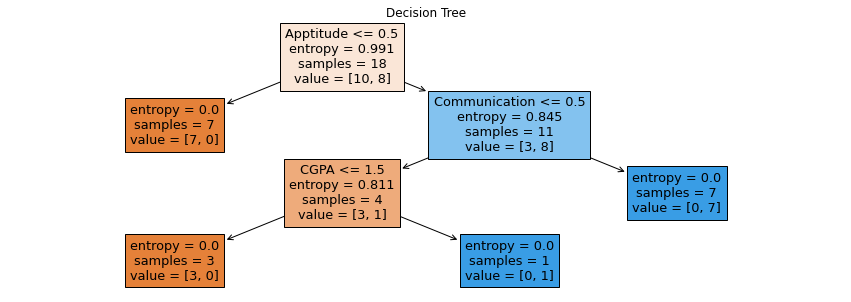

In [34]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plot_tree(dtree,feature_names=list(x.columns),filled=True)
plt.title("Decision Tree")
plt.show()

In [42]:
#2nd dataset
import pandas as pd
df=pd.read_csv('DecisionTree_Sports.csv')
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,Sunny,Hot,High,Weak,No
1,Day 2,Sunny,Hot,High,Strong,No
2,Day 3,Cloudy,Hot,High,Weak,Yes
3,Day 4,Rain,Mild,High,Weak,Yes
4,Day 5,Rain,Cool,Normal,Weak,Yes
5,Day 6,Rain,Cool,Normal,Strong,No
6,Day 7,Cloudy,Cool,Normal,Strong,Yes
7,Day 8,Sunny,Mild,High,Weak,No
8,Day 9,Sunny,Cool,Normal,Weak,Yes
9,Day 10,Rain,Mild,Normal,Weak,Yes


In [43]:
import numpy as np
df["Weather"]=np.where(df["Weather"]=="Sunny",2,np.where(df["Weather"]=="Cloudy",1,0))
df["Temperature"]=np.where(df["Temperature"]=="Hot",2,np.where(df["Temperature"]=="Mild",1,0))
df["Humidity"]=np.where(df["Humidity"]=="High",1,0)
df["Wind"]=np.where(df["Wind"]=="Strong",1,0)
df["Play_Sports?"]=np.where(df["Play_Sports?"]=="Yes",1,0)

In [44]:
df

,Day,Weather,Temperature,Humidity,Wind,Play_Sports?
0,Day 1,2,2,1,0,0
1,Day 2,2,2,1,1,0
2,Day 3,1,2,1,0,1
3,Day 4,0,1,1,0,1
4,Day 5,0,0,0,0,1
5,Day 6,0,0,0,1,0
6,Day 7,1,0,0,1,1
7,Day 8,2,1,1,0,0
8,Day 9,2,0,0,0,1
9,Day 10,0,1,0,0,1


In [48]:
x=df.iloc[:,1:5]
y=df['Play_Sports?']
print(x.shape)
print(y.shape)

(14, 4)
(14,)


In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='entropy') #we can add max_depth attribute
model=dtree.fit(x,y)
y_pred=model.predict(x)
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [50]:
from sklearn.metrics import recall_score,accuracy_score
a=accuracy_score(y,y_pred)
print("accuracy score:",a)
sensitivity=recall_score(y,y_pred)
print("sensitivity:",sensitivity)
specificity=recall_score(y,y_pred,pos_label=0)#specificity
print("specificity:",specificity)

accuracy score: 1.0
sensitivity: 1.0
specificity: 1.0


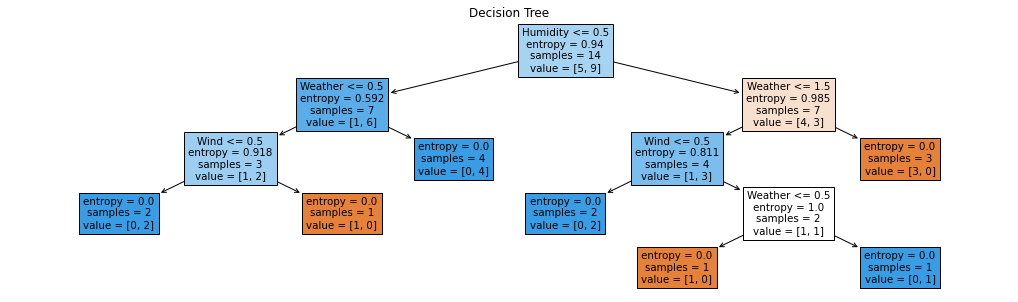

In [52]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plot_tree(dtree,feature_names=list(x.columns),filled=True)
plt.title("Decision Tree")
plt.show()